**Sarah Graber**<br>
sg3518<br>
Assignment 4<br>
Collaborators: Emily Zhang, Adolfo Muñiz Cortés, Yasmeen Asali

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import fxns

%matplotlib inline

## Problem 1

In [2]:
# constants for Fe: rho, c, n
iron = [8300, 0.00349, 0.528]

G = 6.67408 * 10**(-11)

# equation of state
def rho(P, element):
    return (element[0] + (element[1] * P**element[2]))

In [3]:
def Runge_Kutta(dr, m, r, P, element):
    dP1 = dr * (-G) * (1/r**2) * m * rho(P, element)
    dm1 = dr * 4 * math.pi * r**2 * rho(P, element)
    dP2 = dr * (-G) * (1/(r + dr/2)**2) * (m + dm1/2) * rho(P + dP1/2, element)
    dm2 = dr * 4 * math.pi * (r + dr/2)**2 * rho(P + dP1/2, element)
    dP3 = dr * (-G) * (1/(r + dr/2)**2) * (m + dm2/2) * rho(P + dP2/2, element)
    dm3 = dr * 4 * math.pi * (r + dr/2)**2 * rho(P + dP2/2, element)
    dP4 = dr * (-G) * (1/(r + dr)**2) * (m + dm3) * rho(P +dP3, element)
    dm4 = dr * 4 * math.pi * (r + dr)**2 * rho(P + dP3, element)
    
    m = m + (1/6)*(dm1 + 2*dm2 + 2*dm3 + dm4)
    P = P + (1/6)*(dP1 + 2*dP2 + 2*dP3 + dP4)
    return m, P, dP1, dP2, dP3

In [4]:
def get_params(P, element):
    m, r, dr = 0, 1, 10000

    rhos, Ps, ms, rs = [], [], [], []
    
    while P > 0:
        (m, P, dP1, dP2, dP3) = Runge_Kutta(dr, m, r, P, element)
        r = r + dr
        rhos.append(rho(P, iron))
        Ps.append(P)
        ms.append(m)
        rs.append(r)
        #print(dP1)
        if P <= 0 or (P + dP1/2) <= 0 or (P + dP2/2) <= 0 or (P + dP3) <= 0:
            break
    
    density = np.array(ms) / ((4/3) * math.pi * (np.array(rs)))

    return rhos, Ps, ms, rs, density, rs[len(rs)-1] / 6371000, ms[len(ms)-1] / (5.97 * 10**24)

final radius = 0.9794382357557683 [Earth radii], final mass = 2.0789206135116274 [Earth masses]


Text(0, 0.5, 'density [kg/m3]')

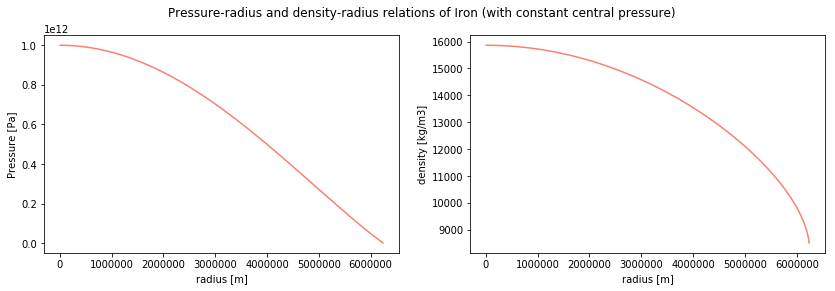

In [5]:
rho_iron, P_iron, m_iron, r_iron, density_iron = get_params(10**12, iron)[0:5]
print("final radius =", get_params(10**12, iron)[5], "[Earth radii], final mass =", get_params(10**12, iron)[6], "[Earth masses]")        

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle('Pressure-radius and density-radius relations of Iron (with constant central pressure)')
ax1.plot(r_iron, P_iron, color="salmon")
ax1.set_xlabel("radius [m]")
ax1.set_ylabel("Pressure [Pa]")
ax2.plot(r_iron, rho_iron, color="salmon")
ax2.set_xlabel("radius [m]")
ax2.set_ylabel("density [kg/m3]")

## Problem 2

In [6]:
m_iron1, r_iron1 = [], []

# 8.83 corresponds to M = 0.1 Earth M; 14.795 corresponds to M = 100 Earth M
series = [8.83, 9.5, 10, 10.6, 11.2, 11.8, 12.4, 13, 13.9, 14.795]

for i in series:
    m_iron1.append(get_params(10**i, iron)[6])
    r_iron1.append(get_params(10**i, iron)[5])

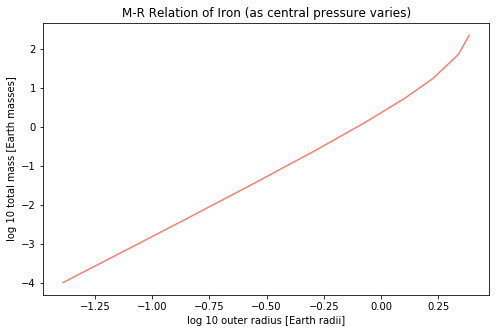

In [7]:
plt.figure(figsize=(8,5))
plt.plot(np.log10(r_iron1), np.log10(m_iron1), color="salmon")
plt.title("M-R Relation of Iron (as central pressure varies)")
plt.xlabel("log 10 outer radius [Earth radii]")
plt.ylabel("log 10 total mass [Earth masses]")
plt.show()

It seems easier to detect high-mass planets with the transit method, because they tend to have a bigger radius, and thus block more starlight to be visible.

## Problem 3

In [8]:
# constants for H20: rho, c, n
water = [1460, 0.00311, 0.513]

# constants for MgSi03: rho, c, n
perovskite = [4100, 0.00161, 0.541]

In [9]:
m_water, r_water, m_perovskite, r_perovskite = [], [], [], []

# 8.83 corresponds to M = 0.1 Earth M; 14.795 corresponds to M = 100 Earth M
series = [8.83, 9.5, 10, 10.6, 11.2, 11.8, 12.4, 13, 13.9, 14.795]

for i in series:
    m_water.append(get_params(10**i, water)[6])
    r_water.append(get_params(10**i, water)[5])
    m_perovskite.append(get_params(10**i, perovskite)[6])
    r_perovskite.append(get_params(10**i, perovskite)[5])

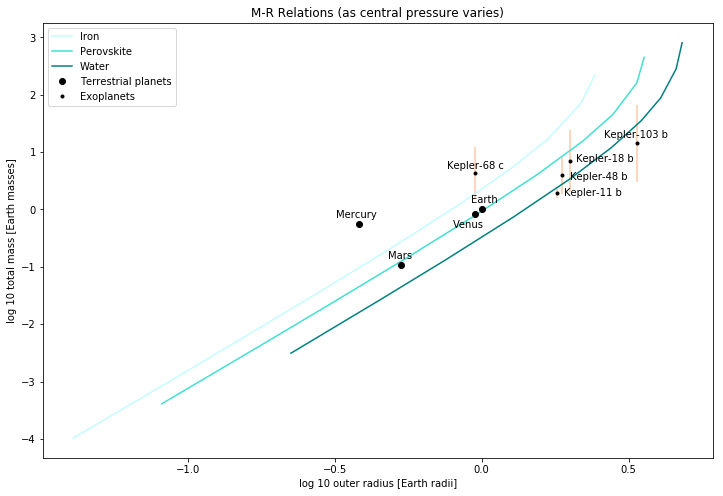

In [10]:
plt.figure(figsize=(12,8))

# different elements
plt.plot(np.log10(r_iron1), np.log10(m_iron1), color="#c4fcff", label="Iron")
plt.plot(np.log10(r_perovskite), np.log10(m_perovskite), color="turquoise", label="Perovskite")
plt.plot(np.log10(r_water), np.log10(m_water), color="teal", label="Water")

# terrestrial planets
plt.plot(np.log10(1),np.log10(1),'ko', label="Terrestrial planets")
plt.annotate("Earth", (np.log10(0.92),np.log10(1.3)))
plt.plot(np.log10(0.3825),np.log10(0.55), 'ko')
plt.annotate("Mercury", (np.log10(0.32), np.log10(0.73)))
plt.plot(np.log10(0.9488),np.log10(0.815), 'ko')
plt.annotate("Venus", (np.log10(0.8), np.log10(0.47)))
plt.plot(np.log10(0.5314),np.log10(0.107), 'ko')
plt.annotate("Mars", (np.log10(0.48), np.log10(0.14)))

# exoplanets
plt.plot(np.log10(1.8),np.log10(1.9), 'k.', label="Exoplanets")
plt.errorbar(np.log10(1.8),np.log10(1.9), yerr=np.log10(1.2), color="#ffc8a6")
plt.annotate("Kepler-11 b", (np.log10(1.9), np.log10(1.7)))
plt.plot(np.log10(2),np.log10(6.9), 'k.')
plt.errorbar(np.log10(2),np.log10(6.9), yerr=np.log10(3.48), color="#ffc8a6")
plt.annotate("Kepler-18 b", (np.log10(2.1), np.log10(6.7)))
plt.plot(np.log10(.95),np.log10(4.38), 'k.')
plt.errorbar(np.log10(.95),np.log10(4.38), yerr=np.log10(2.8), color="#ffc8a6")
plt.annotate("Kepler-68 c", (np.log10(.76), np.log10(5.2)))
plt.plot(np.log10(3.37),np.log10(14.11), 'k.')
plt.errorbar(np.log10(3.37),np.log10(14.11), yerr=np.log10(4.7), color="#ffc8a6")
plt.annotate("Kepler-103 b", (np.log10(2.6), np.log10(18)))
plt.plot(np.log10(1.88),np.log10(3.94), 'k.')
plt.errorbar(np.log10(1.88),np.log10(3.94), yerr=np.log10(2.1), color="#ffc8a6")
plt.annotate("Kepler-48 b", (np.log10(2), np.log10(3.3)))

plt.title("M-R Relations (as central pressure varies)")
plt.xlabel("log 10 outer radius [Earth radii]")
plt.ylabel("log 10 total mass [Earth masses]")
plt.legend()
plt.show()

The exoplanets we've found with Kepler seem to all fall in the same M-R range: both bigger and more massive than Earth, though a few look Earth-sized in terms of radius.